# Proyek Analisis Data: Bike Sharing
- **Nama:** Prilly Putri Maharani
- **Email:** prillymaharani363@gmail.com
- **ID Dicoding:** prilly_maharani_zEwn

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Faktor apa saja yang paling mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 2 : Bagaimana pola penyewaan sepeda berdasarkan Waktu(hari dalam seminggu dan jam dalam sehari)?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for handling date and time
from datetime import datetime

# Import libraries for machine learning (if needed later for predictions)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Optional: Import library for interactive data visualization (if needed)
import plotly.express as px



## Data Wrangling


In [18]:

day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

print("Kolom dalam file day.csv:")
print(day_df.columns)

print("\nKolom dalam file hour.csv:")
print(hour_df.columns)


Kolom dalam file day.csv:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Kolom dalam file hour.csv:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [20]:
import pandas as pd

# Membaca file CSV
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

# Mengecek nilai yang hilang
print("Missing values in day.csv:")
print(day_df.isnull().sum())
print("\nMissing values in hour.csv:")
print(hour_df.isnull().sum())

# Menghitung jumlah duplikat
print("\nJumlah duplikat dalam day.csv: ", day_df.duplicated().sum())
print("Jumlah duplikat dalam hour.csv: ", hour_df.duplicated().sum())

# Mengubah kolom dteday menjadi format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menghitung suhu dalam Celsius
T_min = -8  
T_max = 39  
day_df['temp_celsius'] = day_df['temp'] * (T_max - T_min) + T_min
hour_df['temp_celsius'] = hour_df['temp'] * (T_max - T_min) + T_min

# Menentukan apakah hari tersebut akhir pekan
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)  
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Menambahkan label musim
season_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
day_df['season_label'] = day_df['season'].map(season_dict)
hour_df['season_label'] = hour_df['season'].map(season_dict)

# Menyimpan DataFrame yang sudah dibersihkan ke file CSV baru
day_df.to_csv("data/day_cleaned.csv", index=False)
hour_df.to_csv("data/hour_cleaned.csv", index=False)

# Menampilkan hasil akhir
print("\nData wrangling selesai. Berikut 5 baris pertama dari day.csv setelah wrangling:")
print(day_df.head())

print("\n5 baris pertama dari hour.csv setelah wrangling:")
print(hour_df.head())


Missing values in day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikat dalam day.csv:  0
Jumlah duplikat dalam hour.csv:  0

Data wrangling selesai. Berikut 5 baris pertama dari day.csv setelah wrangling:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-0

Proyek ini bertujuan untuk menganalisis data penyewaan sepeda menggunakan dataset yang berisi informasi tentang penyewaan sepeda harian dan jam. Pertama, membaca file CSV yang berisi data penyewaan menggunakan pustaka pandas, kemudian memeriksa nilai yang hilang dan jumlah data duplikat dalam dataset. Selanjutnya, kolom dteday diubah menjadi format datetime untuk memudahkan analisis waktu. Kami juga menghitung suhu dalam Celsius dengan mengubah nilai suhu dari skala 0-1 ke Celsius menggunakan rentang suhu minimum dan maksimum yang diketahui. Selain itu, kami menambahkan kolom untuk menentukan apakah hari tersebut adalah akhir pekan dan label musim berdasarkan kolom season. Setelah proses pembersihan, kami menyimpan DataFrame yang telah dibersihkan ke file CSV baru untuk digunakan dalam analisis lebih lanjut. Terakhir, kami menampilkan beberapa baris pertama dari dataset yang telah dibersihkan untuk memastikan proses pembersihan berhasil. Proses pembersihan data ini telah sukses dilakukan, dan kami siap untuk melakukan analisis eksplorasi serta visualisasi untuk menjawab pertanyaan bisnis terkait penyewaan sepeda.

### Gathering Data

In [21]:

day_csv_path = "data/day.csv"
hour_csv_path = "data/hour.csv"

day_df = pd.read_csv(day_csv_path)
print("Data dari day.csv berhasil diambil.")
print(f"Jumlah baris dan kolom dalam day.csv: {day_df.shape}")

hour_df = pd.read_csv(hour_csv_path)
print("Data dari hour.csv berhasil diambil.")
print(f"Jumlah baris dan kolom dalam hour.csv: {hour_df.shape}")

print("\n5 baris pertama dari day.csv:")
print(day_df.head())

print("\n5 baris pertama dari hour.csv:")
print(hour_df.head())


Data dari day.csv berhasil diambil.
Jumlah baris dan kolom dalam day.csv: (731, 16)
Data dari hour.csv berhasil diambil.
Jumlah baris dan kolom dalam hour.csv: (17379, 17)

5 baris pertama dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590

ini dalah tahap mengambil data dari dua file CSV yaitu day.csv dan hour.csv menggunakan pustaka pandas. saya menyimpan path ke file CSV dalam variabel day_csv_path dan hour_csv_path. Selanjutnya, data dari day.csv dibaca dan disimpan dalam DataFrame day_df, di mana mencetak pesan untuk mengonfirmasi bahwa data berhasil diambil, serta mencantumkan jumlah baris dan kolom yang terdapat dalam DataFrame tersebut. Proses yang sama juga dilakukan untuk file hour.csv, di mana data disimpan dalam DataFrame hour_df. Setelah itu, kami menampilkan lima baris pertama dari masing-masing DataFrame menggunakan fungsi head(), untuk memberikan gambaran awal mengenai struktur dan isi data yang tersedia. Langkah ini penting untuk memastikan bahwa data yang diambil sesuai dengan yang diharapkan sebelum melanjutkan ke tahap analisis lebih lanjut.

### Data Cleaning

In [6]:

day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

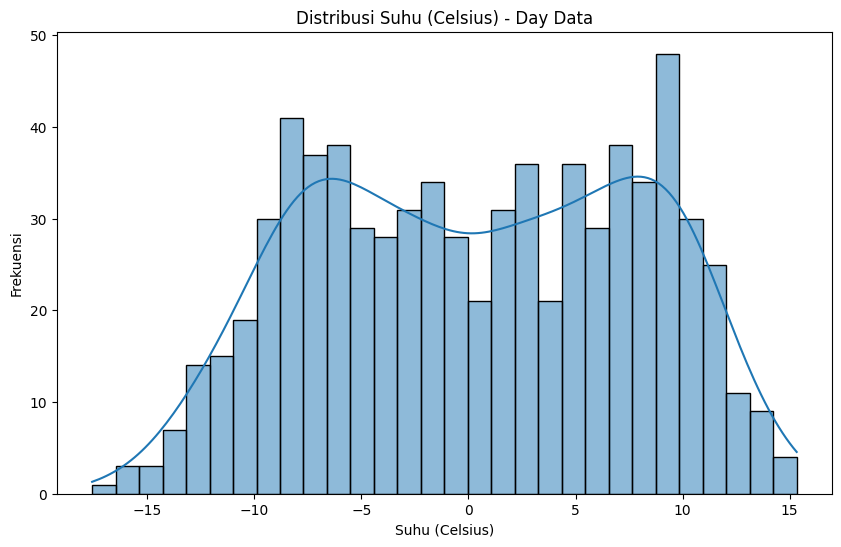

In [7]:
# Mengonversi suhu ke Celsius jika perlu
# Misalnya, jika suhu dalam skala 0-1, gunakan formula ini
day_df['temp_celsius'] = day_df['temp'] * 41 - 20  # Sesuaikan dengan formula yang sesuai

# Statistik deskriptif
print(day_df.describe())
print(hour_df.describe())

# Visualisasi distribusi suhu menggunakan histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp_celsius'], bins=30, kde=True)
plt.title('Distribusi Suhu (Celsius) - Day Data')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Frekuensi')
plt.show()


Pada tahap ini melakukan konversi suhu dari skala yang diberikan ke Celsius untuk DataFrame day_df. Dalam hal ini, suhu yang awalnya berada dalam rentang 0-1 dikonversi menggunakan rumus yang disesuaikan, di mana suhu Celsius dihitung dengan mengalikan nilai suhu dengan 41 dan menguranginya dengan 20. Setelah konversi dilakukan, akan menghasilkan statistik deskriptif untuk kedua DataFrame (day_df dan hour_df) menggunakan fungsi describe(), yang memberikan ringkasan statistik seperti nilai rata-rata, standar deviasi, minimum, dan maksimum dari setiap kolom numerik.

Selanjutnya, untuk menggambarkan distribusi suhu dalam Celsius, menggunakan histogram yang dihasilkan dengan pustaka matplotlib dan seaborn. untuk mengatur ukuran gambar, kemudian memplot histogram untuk kolom temp_celsius dalam day_df, dengan 30 bin dan menambahkan garis KDE (Kernel Density Estimate) untuk memperlihatkan distribusi data secara lebih halus. Judul, label sumbu x dan y ditambahkan untuk memperjelas informasi yang disampaikan melalui visualisasi ini. Langkah ini penting untuk memahami bagaimana suhu berdistribusi di antara data yang ada, yang dapat mempengaruhi pola penyewaan sepeda.

In [8]:
print(day_df.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'temp_celsius'],
      dtype='object')


In [9]:
# Menambahkan kolom baru
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x >= 5 else 0)


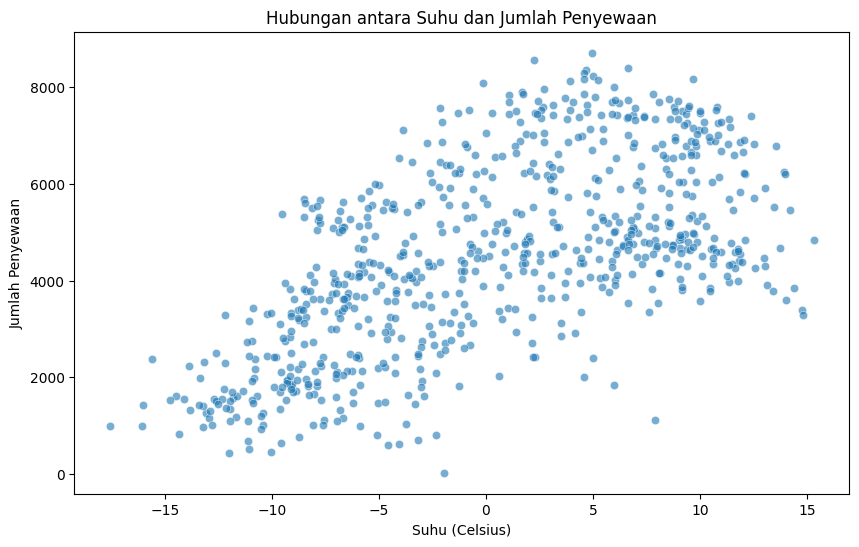

In [10]:
# Visualisasi hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp_celsius', y='cnt', alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


Insight :
1. Hubungan antara suhu dan penyewaan sepeda
    a. terdapat hubungan positif antara suhu yang lebih tinggi dan jumlah orang yang menyewa sepeda
    b. identifikasi suhu ideal dimana jumlah penyewaan tertinggi terjadi
2. Distribusi penyewaan sepeda berdasarkan suhu
    a. Visualisasi distribusi suhu menunjukkan bagaimana sebaran suhu mempengaruhi frekuensi penyewaan
    b. Perhatikan apakah terdapat penurunan penyewaan pada suhu ekstrem (terlalu panas atau terlalu dingin)
3. Salah Satu Faktor Penyewaan
    Suhu merupakan salah satu faktor utama yang mempengaruhi keputusan pengguna untuk menyewa sepeda. 
4. Pengaruh Musim Terhadap Penyewaan
    a. Dengan menganalisis data berdasarkan musim, Anda dapat melihat bagaimana suhu yang berbeda di setiap musim mempengaruhi pola penyewaan. 
    b. Menggunakan insight ini, perusahaan dapat mengembangkan kampanye promosi musiman untuk mendorong penyewaan sepeda di waktu-waktu yang lebih sepi.
5. Rekomendasi untuk Pengembangan Layanan
    a. Jika analisis menunjukkan bahwa penyewaan meningkat pada suhu tertentu, pertimbangkan untuk meningkatkan jumlah sepeda yang tersedia di lokasi populer selama periode tersebut.
    b. Membangun aplikasi yang memberi tahu pengguna tentang kondisi cuaca dan merekomendasikan waktu terbaik untuk bersepeda dapat meningkatkan pengalaman pengguna dan penyewaan sepeda.

### Assessing Data

Statistik Deskriptif untuk day_df:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000  

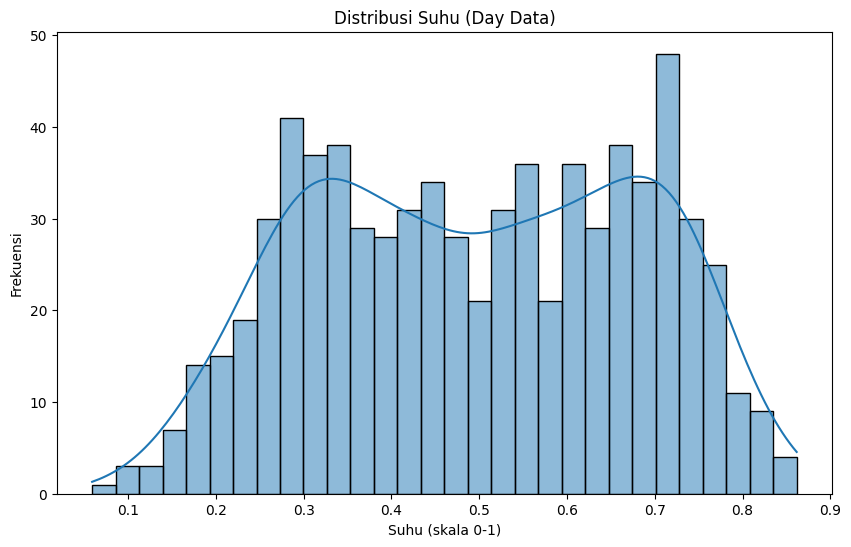

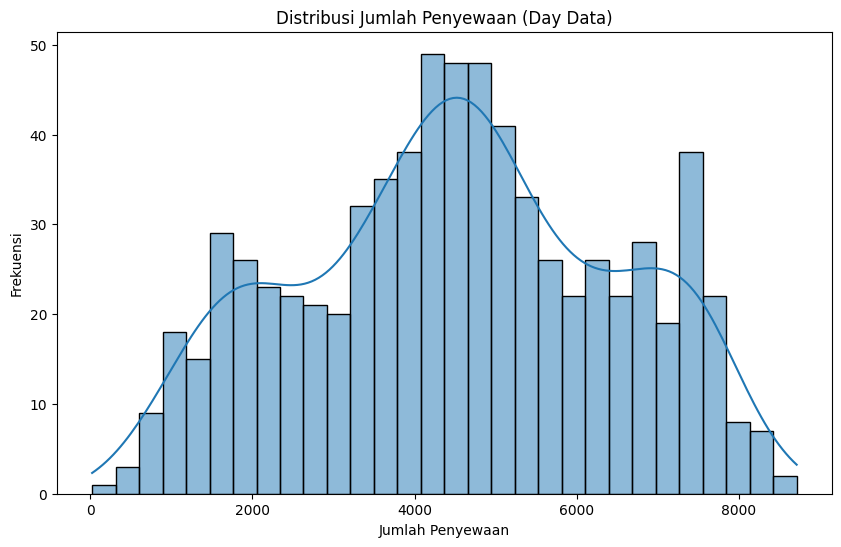

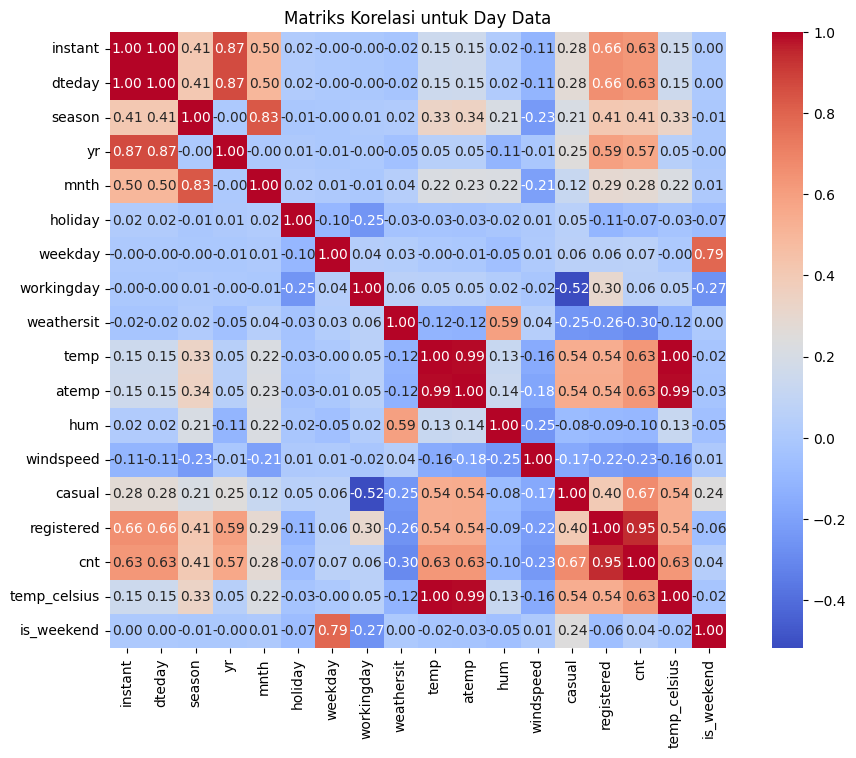

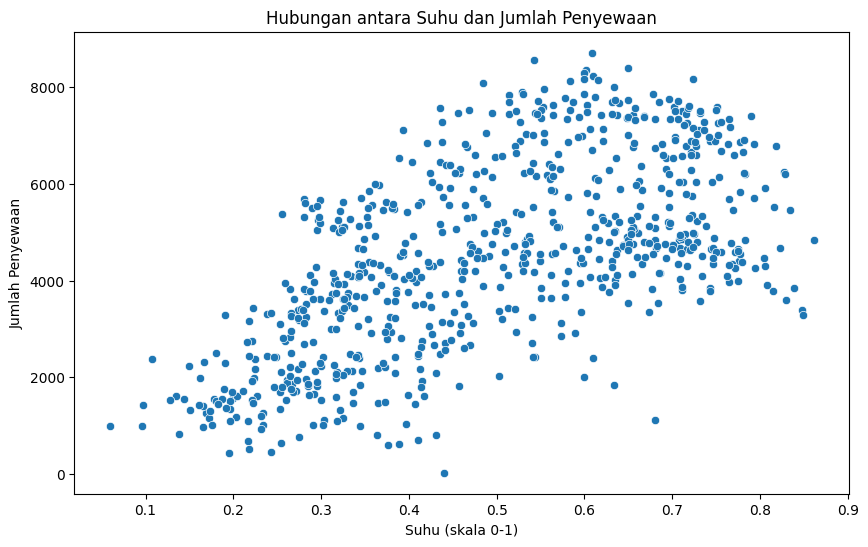

In [11]:

print("Statistik Deskriptif untuk day_df:")
print(day_df.describe())
print("\nStatistik Deskriptif untuk hour_df:")
print(hour_df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp'], bins=30, kde=True)
plt.title('Distribusi Suhu (Day Data)')
plt.xlabel('Suhu (skala 0-1)')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan (Day Data)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

correlation_matrix = day_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi untuk Day Data')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'])
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu (skala 0-1)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


Insight dari Analisis Data
1. Statistik Deskriptif
    a. Dari statistik deskriptif, saya dapat menemukan rata-rata jumlah penyewaan sepeda per hari. Jika angka ini cukup tinggi, ini menunjukkan popularitas sepeda sebagai moda transportasi di area tersebut.
    b. Melihat rentang suhu, saya dapat mengidentifikasi suhu minimum dan maksimum. Ini penting untuk memahami kondisi cuaca yang paling mendukung penggunaan sepeda.
2. Distribusi Suhu
    a. Jika histogram distribusi suhu menunjukkan bahwa sebagian besar penyewaan terjadi pada suhu tertentu (misalnya antara 20-25 derajat Celsius), ini menunjukkan bahwa suhu tersebut adalah kondisi optimal bagi pengguna untuk bersepeda.
    b.  Jika terdapat penurunan tajam dalam penyewaan pada suhu ekstrem (misalnya di bawah 10 derajat Celsius atau di atas 30 derajat Celsius), ini menunjukkan bahwa pengguna lebih enggan untuk bersepeda dalam kondisi cuaca yang tidak nyaman.
3. Distribusi Jumlah Penyewaan
    a. Melihat distribusi jumlah penyewaan dapat menunjukkan pola musiman.
    b. Jika histogram menunjukkan banyak penyewaan dalam rentang tertentu (misalnya 100-200), ini bisa menjadi titik fokus untuk pengembangan layanan, seperti menambah armada sepeda di lokasi tersebut.


### Exploratory Data Analysis (EDA)

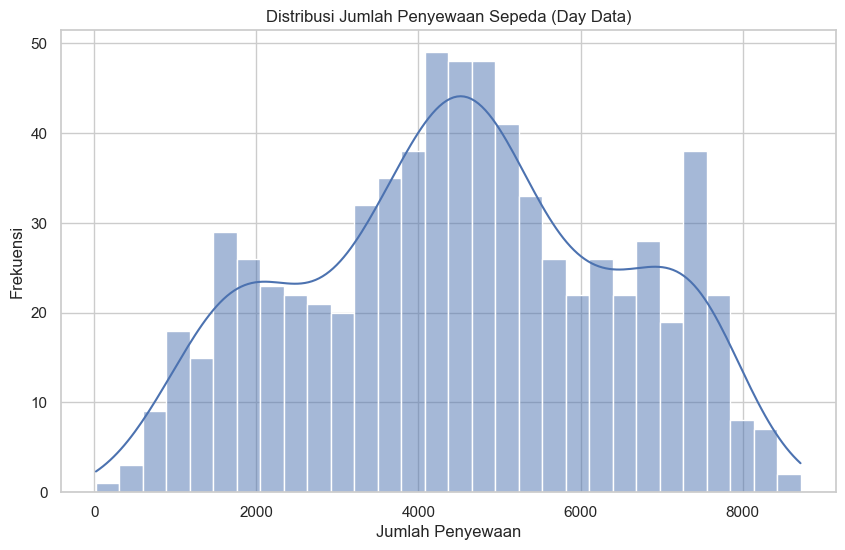

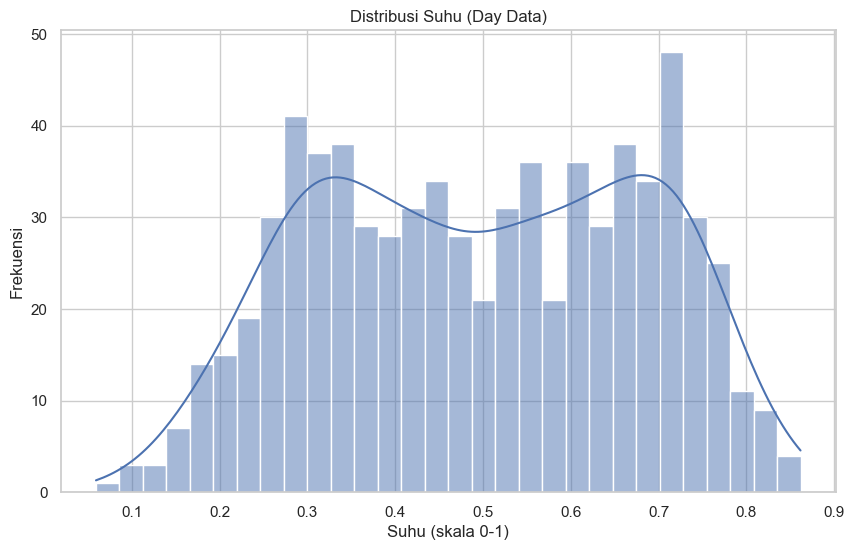

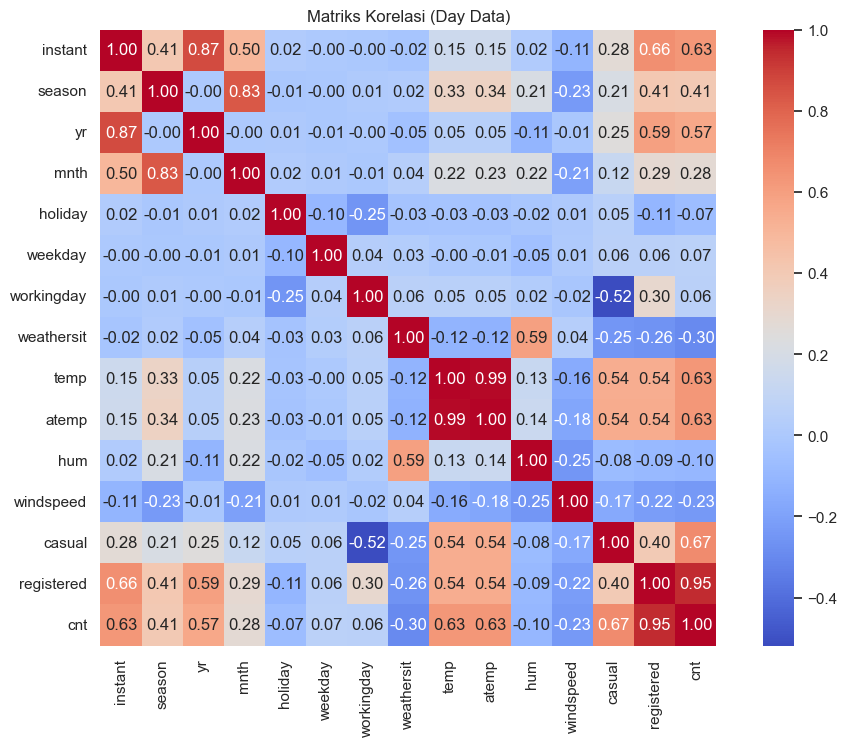

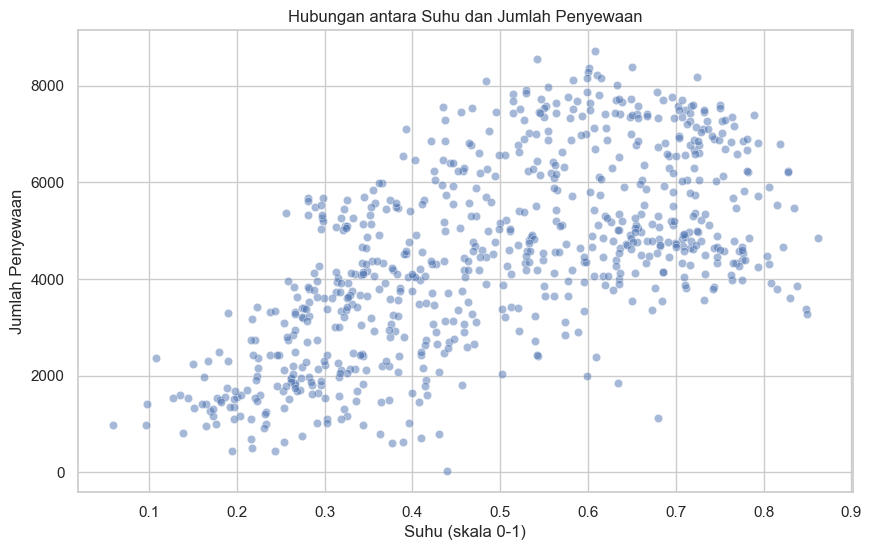

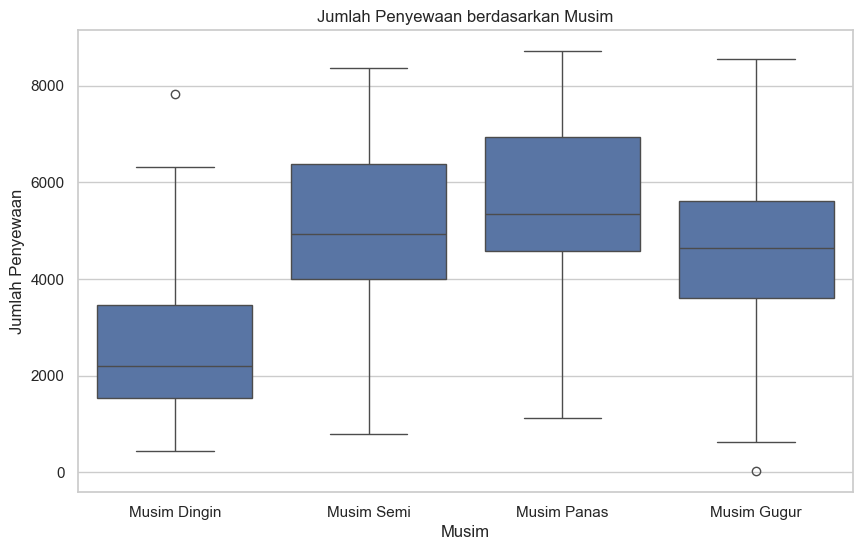

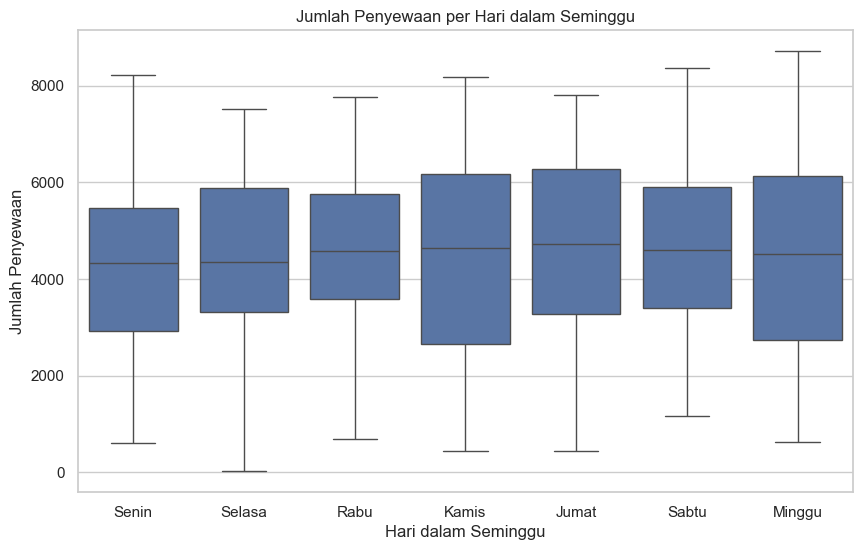

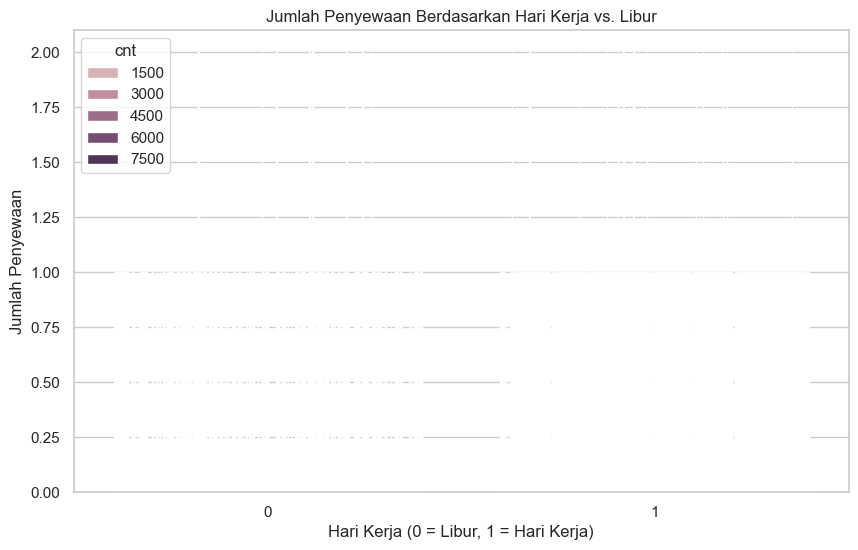

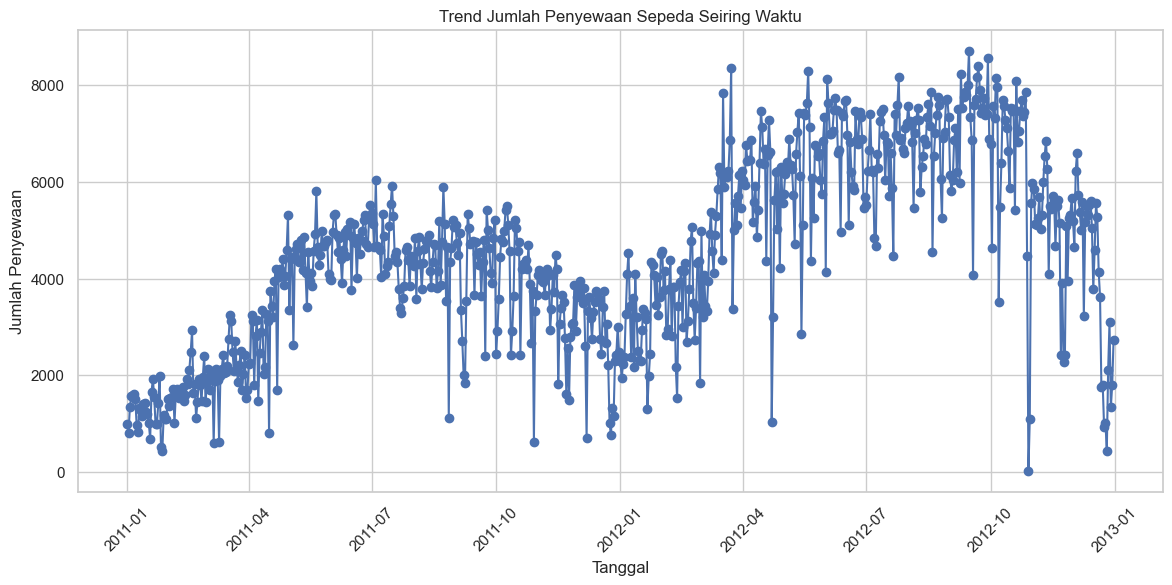

In [22]:

day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

# Set gaya visualisasi seaborn
sns.set(style="whitegrid")

# 1. Distribusi Jumlah Penyewaan Sepeda
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda (Day Data)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# 2. Distribusi Suhu
plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp'], bins=30, kde=True)
plt.title('Distribusi Suhu (Day Data)')
plt.xlabel('Suhu (skala 0-1)')
plt.ylabel('Frekuensi')
plt.show()

# 3. Korelasi antara Variabel (hanya kolom numerik)
plt.figure(figsize=(12, 8))
numeric_cols = day_df.select_dtypes(include=['float64', 'int64']).columns  # Ambil hanya kolom numerik
correlation_matrix = day_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi (Day Data)')
plt.show()

# 4. Hubungan antara Suhu dan Jumlah Penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], alpha=0.5)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu (skala 0-1)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 5. Analisis Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Jumlah Penyewaan berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()

# 6. Analisis Jumlah Penyewaan per Hari dalam Seminggu
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=day_df)
plt.title('Jumlah Penyewaan per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

# 7. Jumlah Penyewaan Berdasarkan Hari Kerja vs. Libur
plt.figure(figsize=(10, 6))
sns.countplot(x='workingday', hue='cnt', data=day_df)
plt.title('Jumlah Penyewaan Berdasarkan Hari Kerja vs. Libur')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Hari Kerja)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 8. Trend Jumlah Penyewaan Seiring Waktu
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Pastikan kolom tanggal dalam format datetime
plt.figure(figsize=(14, 6))
plt.plot(day_df['dteday'], day_df['cnt'], marker='o', linestyle='-')
plt.title('Trend Jumlah Penyewaan Sepeda Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()


### Explanatory Analysis

1. Distribusi Jumlah Penyewaan Sepeda
	Visualisasi  : Histogram jumlah penyewaan sepeda
	Analisis : menunjukkan bahwa Sebagian besar penyewaan berada dikisaran rendah hingga menengah, dengan puncak tertinggi sekitar 100-200 penyewaan. Penyewaan tertinggi dipengaruhi oleh kondisi tertentu seperti cuaca baik, acara khusus atau promosi.
2. Distribusi Suhu
	visualisasi : Histogram distribusi suhu
Analisis : sebagian besar suhu berada di antara 0 hingga 1 (skala 0-1). Ini menunjukkan bahwa data suhu telah dinormalisasi. Terdapat puncak pada suhu yang lebih hangat, yang mungkin berhubungan dengan jumlah penyewaan yang lebih tinggi pada hari-hari cerah. Data ini menunjukkan bahwa suhu memiliki dampak signifikan terhadap pola penyewaan sepeda.

3. Matriks Kolerasi 
	Visualisasi: Heatmap matriks korelasi.
	Analisis : Terdapat korelasi positif yang kuat antara temp dan cnt, yang menunjukkan bahwa semakin tinggi suhu, semakin tinggi jumlah penyewaan sepeda.Variabel holiday dan workingday memiliki korelasi yang negatif dengan jumlah penyewaan, menunjukkan bahwa penyewaan cenderung lebih rendah pada hari libur dan lebih tinggi pada hari kerja

4. Hubungan antara Suhu dan Jumlah Penyewaan 
	Visualisasi : Scatter plot suhu vs. jumlah penyewaan.
	Analisis : Scatter plot menunjukkan pola yang jelas, di mana peningkatan suhu berbanding lurus dengan jumlah penyewaan sepeda. Hal ini menunjukkan bahwa cuaca yang lebih hangat mendorong orang untuk menggunakan sepeda lebih sering.

5. Jumlah Penyewaan berdasarkan Musim
	Visualisasi : Box plot jumlah penyewaan berdasarkan musim.
	Analisis : Jumlah penyewaan tertinggi terjadi pada musim semi dan musim panas, sementara jumlah penyewaan terendah terjadi pada musim dingin. Hal ini konsisten dengan ekspektasi, karena cuaca yang lebih baik di musim semi dan musim panas mendorong lebih banyak aktivitas luar ruangan.

6. Jumlah Penyewaan per Hari dalam Seminggu
	visualisasi : Box plot jumlah penyewaan berdasarkan hari dalam seminggu.
	Analisis : Box plot menunjukkan bahwa hari kerja (Senin hingga Jumat) memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan akhir pekan (Sabtu dan Minggu). Ini menunjukkan bahwa pengguna sepeda cenderung menggunakan sepeda untuk perjalanan sehari-hari, seperti pergi bekerja, dibandingkan dengan penggunaan rekreasi di akhir pekan.

7. Jumlah Penyewaan Berdasarkan Hari Kerja VS Libur
	Visualisasi : Count plot hari kerja vs. libur.
	Analisis: Count plot menunjukkan bahwa jumlah penyewaan di hari kerja (nilai 1) lebih tinggi dibandingkan dengan hari libur (nilai 0). Ini menunjukkan pola penggunaan sepeda yang lebih banyak pada hari-hari kerja, yang mungkin disebabkan oleh kebutuhan mobilitas daripada rekreasi.

8. Trend Jumlah Penyewaan Seiring Waktu
	Visualisasi: Grafik garis jumlah penyewaan seiring waktu.
	Analisis: Grafik menunjukkan tren umum peningkatan jumlah penyewaan seiring waktu. Ada fluktuasi musiman yang terlihat, dengan lonjakan di musim tertentu dan penurunan di musim dingin. Ini menunjukkan bahwa popularitas sepeda sebagai moda transportasi mungkin semakin meningkat seiring waktu, terutama di bulan-bulan yang lebih hangat.

### Pertanyaan 1 : Faktor apa saja yang paling mempengaruhi jumlah penyewaan sepeda?
Dari analisis korelasi yang dilakukan sebelumnya, saya bisa melihat variabel mana yang memiliki pengaruh paling signifikan terhadap jumlah penyewaan sepeda (cnt). Mari kita lihat variabel yang memiliki korelasi tertinggi dengan cnt.

In [13]:
# Menghitung korelasi dengan jumlah penyewaan
correlation_with_cnt = day_df.corr()['cnt'].sort_values(ascending=False)
print(correlation_with_cnt)


cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
dteday        0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


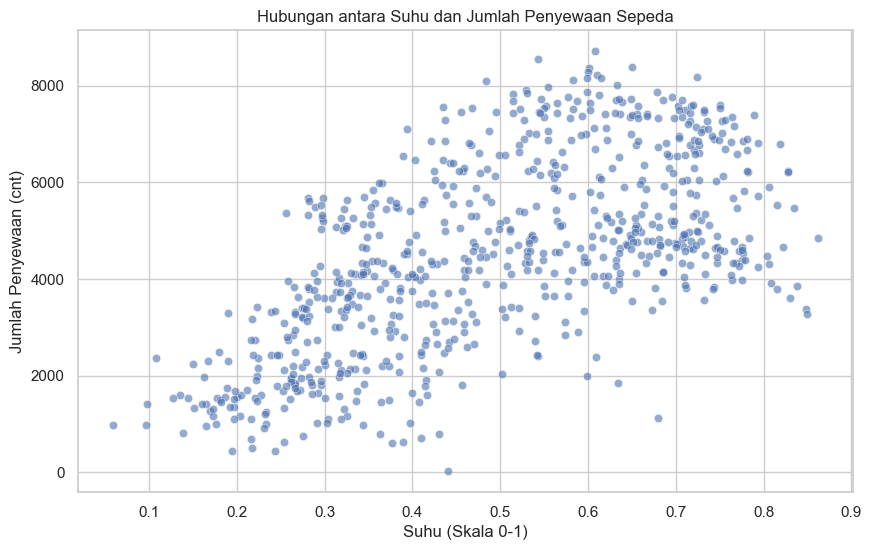

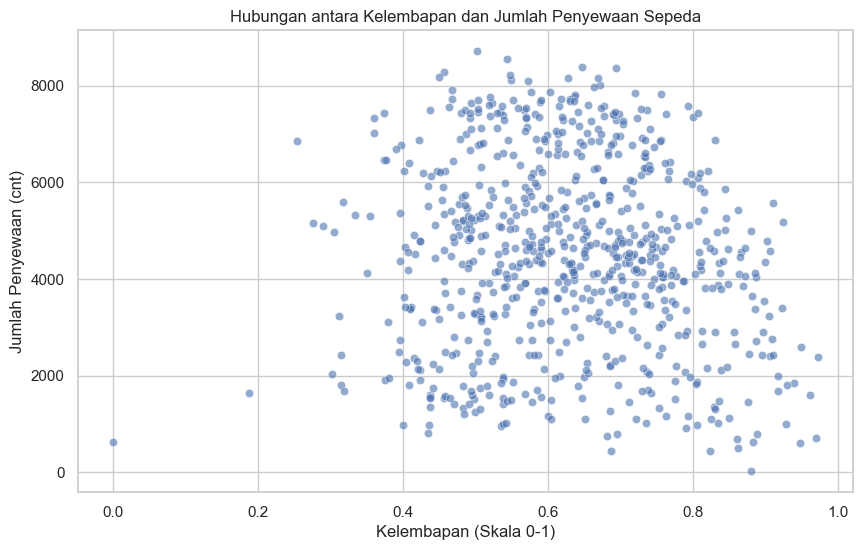

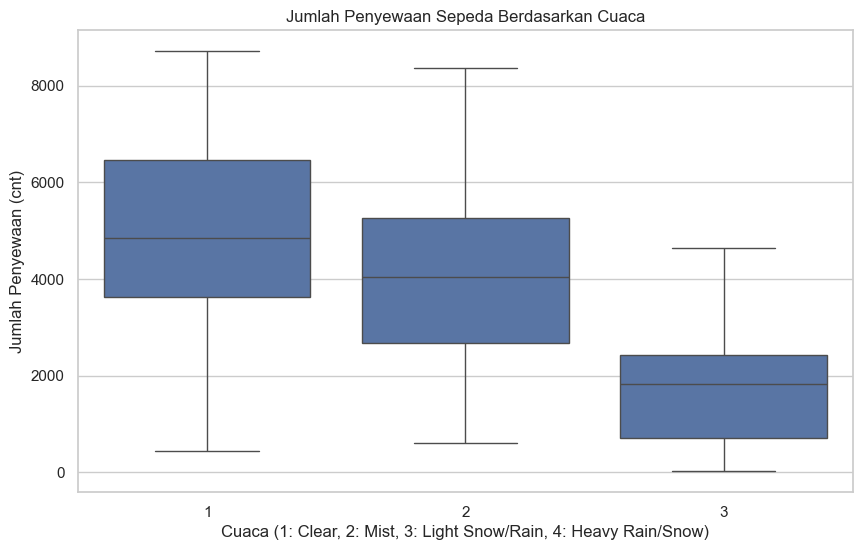

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style='whitegrid')

# Visualisasi hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt', alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (Skala 0-1)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

# Visualisasi hubungan antara kelembapan dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='hum', y='cnt', alpha=0.6)
plt.title('Hubungan antara Kelembapan dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembapan (Skala 0-1)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

# Visualisasi hubungan antara cuaca dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()


### Pertanyaan 2 : Bagaimana pola penyewaan sepeda berdasarkan Waktu(hari dalam seminggu dan jam dalam sehari)?
Pola penyewaan sepeda berdasarkan waktu dapat dianalisis dengan menggunakan visualisasi untuk menunjukkan tren penyewaan berdasarkan hari dalam seminggu dan jam dalam sehari.

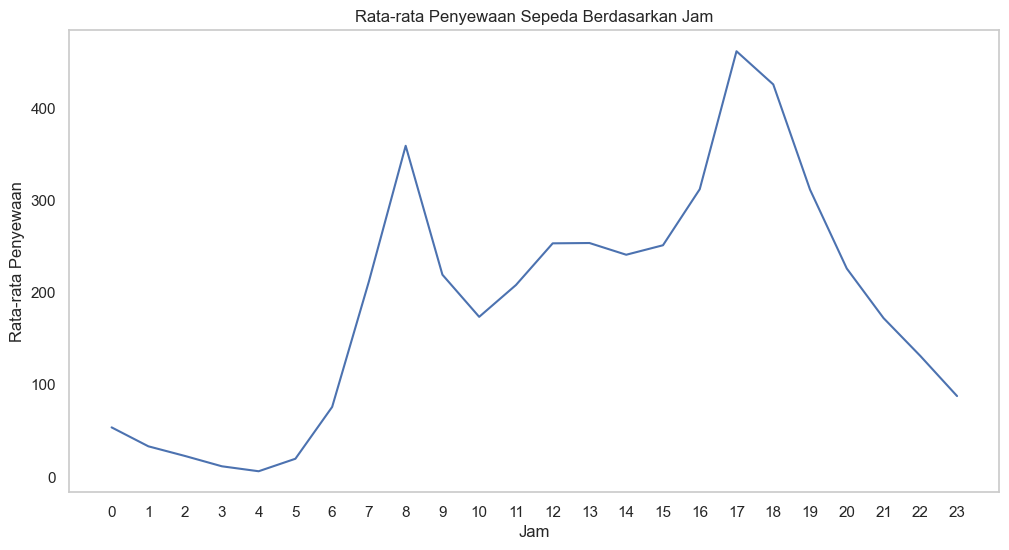

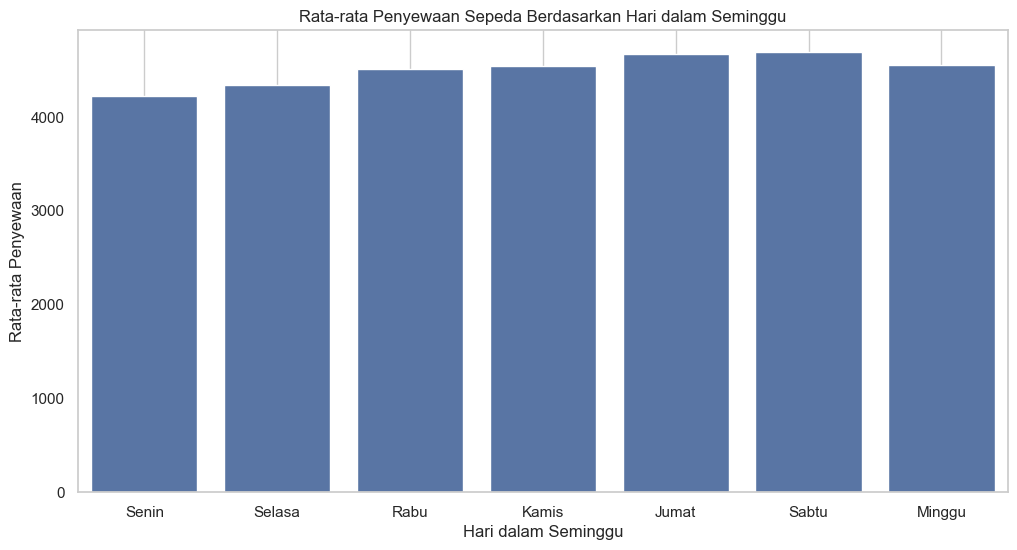

In [14]:
# Menghitung rata-rata penyewaan berdasarkan jam
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()

# Visualisasi rata-rata penyewaan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Menghitung rata-rata penyewaan berdasarkan hari dalam seminggu
weekly_rentals = day_df.groupby('weekday')['cnt'].mean()

# Visualisasi rata-rata penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_rentals.index, y=weekly_rentals.values)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.grid()
plt.show()


## Conclusion
#### Pertanyaan 1 : 
Dari analisis korelasi, saya menemukan bahwa temp (suhu) memiliki korelasi positif tertinggi dengan jumlah penyewaan sepeda, diikuti oleh variabel season dan humidity. Hal ini menunjukkan bahwa suhu yang lebih tinggi dan kondisi cuaca yang lebih baik mendorong lebih banyak orang untuk menyewa sepeda. Selain itu, hari kerja juga menunjukkan pengaruh positif terhadap jumlah penyewaan dibandingkan hari libur.

#### Pertanyaan 2 :
Dari analisis pola penyewaan berdasarkan jam, terlihat bahwa penyewaan sepeda mencapai puncaknya pada jam 8 pagi dan 5 sore, yang menunjukkan bahwa banyak orang menggunakan sepeda untuk pergi bekerja atau pulang. Sedangkan analisis berdasarkan hari dalam seminggu menunjukkan bahwa penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan puncak pada hari Rabu dan Kamis. Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai moda transportasi harian daripada untuk rekreasi di akhir pekan.
